In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import re
import seaborn as sns
import matplotlib.ticker as ticker

In [6]:
customer_data=pd.read_csv("./application_data.csv");
customer_prev_data=pd.read_csv("./previous_application.csv");

In [7]:
# Information about the application DataFrame
customer_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
# Information about the previous application DataFrame
customer_prev_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
# Checking null values in Customer data
null_sum= customer_data.isnull().sum()
perc_missing= pd.DataFrame({'Columns': null_sum.index, 'Percentage': null_sum.values/customer_data.shape[0]*100})
perc_missing

,Columns,Percentage
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
119,AMT_REQ_CREDIT_BUREAU_MON,13.501631
120,AMT_REQ_CREDIT_BUREAU_QRT,13.501631


In [10]:
#Converting previous application missing value into percentages
null_prev_sum= customer_prev_data.isnull().sum()
perc_missing_prev= pd.DataFrame({'Columns': null_prev_sum.index, 'Percentage': null_prev_sum.values/customer_prev_data.shape[0]*100})

In [11]:
perc_missing_prev

,Columns,Percentage
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,AMT_ANNUITY,22.286665
4,AMT_APPLICATION,0.000000
5,AMT_CREDIT,0.000060
6,AMT_DOWN_PAYMENT,53.636480
7,AMT_GOODS_PRICE,23.081773
8,WEEKDAY_APPR_PROCESS_START,0.000000
9,HOUR_APPR_PROCESS_START,0.000000


In [12]:
empty_cols= null_prev_sum[null_prev_sum>(0.3*len(null_prev_sum))]
len(empty_cols)

15

In [13]:
# Removing those 15 columns for previous application data
empty_cols = list(empty_cols[empty_cols.values>=0.3].index)
customer_prev_data.drop(labels=empty_cols,axis=1,inplace=True)

customer_prev_data.shape

(1670214, 22)

In [14]:
# Dropping unnecessary values in NAME_CASH_LOAN_PURPOSE column for previous application data

customer_prev_data=customer_prev_data.drop(customer_prev_data[customer_prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
customer_prev_data=customer_prev_data.drop(customer_prev_data[customer_prev_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
customer_prev_data=customer_prev_data.drop(customer_prev_data[customer_prev_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

customer_prev_data.shape

(69635, 22)

In [15]:
# Columns with more than 50% missing values for the application data

missing_more_50 = perc_missing [perc_missing['Percentage']>=50]
missing_more_50

,Columns,Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
52,FLOORSMIN_AVG,67.848630
53,LANDAREA_AVG,59.376738


In [16]:
#Droppng the columnns with more than 50% missing values for application data

customer_data = customer_data.drop(columns=missing_more_50.Columns.to_list())
customer_data 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
customer_data = customer_data.drop(columns=['NAME_TYPE_SUITE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3','REGION_RATING_CLIENT_W_CITY','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE'])
customer_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Checking for the missing values less than 50 percent for application data

val_missing_50 = pd.DataFrame({'Columns':customer_data.isnull().sum().index,'Percentage':(customer_data.isnull().sum().values/customer_data.shape[0])*100})
filteredCols = val_missing_50 [val_missing_50["Percentage"]>0]
filteredCols 

,Columns,Percentage
9,AMT_ANNUITY,0.003902
10,AMT_GOODS_PRICE,0.090403
20,OCCUPATION_TYPE,31.345545
21,CNT_FAM_MEMBERS,0.000650
26,OBS_30_CNT_SOCIAL_CIRCLE,0.332021
27,DEF_30_CNT_SOCIAL_CIRCLE,0.332021
28,OBS_60_CNT_SOCIAL_CIRCLE,0.332021
29,DEF_60_CNT_SOCIAL_CIRCLE,0.332021
30,AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
31,AMT_REQ_CREDIT_BUREAU_DAY,13.501631


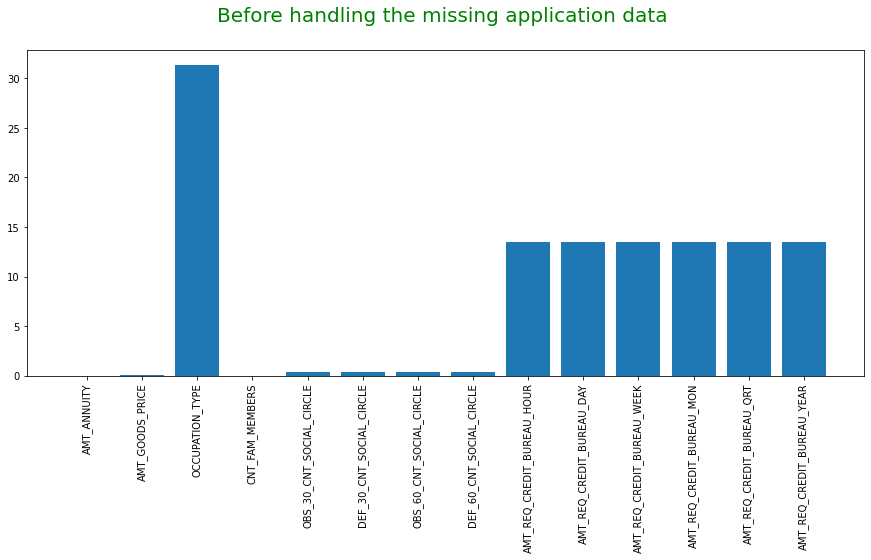

In [19]:
#Plotting the graph for displaying the missing data percentage 

y_vals = filteredCols.Columns.tolist()
x_vals = filteredCols.Percentage.tolist()

# Data to plot

plt.figure(figsize=[15,6])
plt.bar(range(len(y_vals)), x_vals, tick_label=y_vals)
plt.title("Before handling the missing application data \n", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.show()

In [20]:
#describing the AMT_ANNUITY column
customer_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [21]:
# imputing the missing value in the AMT_ANNUITY column with median value 

customer_data['AMT_ANNUITY'] = customer_data['AMT_ANNUITY'].fillna(customer_data['AMT_ANNUITY'].median())

In [22]:
#validating the missing value for column AMT_ANNUITY after replacing with median value

customer_data.AMT_ANNUITY.isnull().sum()

0

In [23]:
#describing the AMT_GOODS_PRICE column

customer_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [24]:
# imputing the missing value in the  AMT_GOODS_PRICE column with median value 

customer_data['AMT_GOODS_PRICE'] = customer_data['AMT_GOODS_PRICE'].fillna( customer_data['AMT_GOODS_PRICE'].median())

In [25]:
#describing the CNT_FAM_MEMBERS column

customer_data.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [26]:
#imputing the missing value in the CNT_FAM_MEMBERS column with median value 

customer_data['CNT_FAM_MEMBERS'] = customer_data['CNT_FAM_MEMBERS'].fillna(customer_data['CNT_FAM_MEMBERS'].median())

In [27]:
#describing the OBS_30_CNT_SOCIAL_CIRCLE column

customer_data.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [28]:
#imputing the missing value in the CNT_FAM_MEMBERS column with median value
customer_data['OBS_30_CNT_SOCIAL_CIRCLE'] = customer_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(customer_data['OBS_30_CNT_SOCIAL_CIRCLE'].median())

In [29]:
#describing the DEF_30_CNT_SOCIAL_CIRCLE column

customer_data.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [30]:
#imputng the missing value in the DEF_30_CNT_SOCIAL_CIRCLE column with median value

customer_data['DEF_30_CNT_SOCIAL_CIRCLE'] = customer_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(customer_data['DEF_30_CNT_SOCIAL_CIRCLE'].median())

In [31]:
#describing the OBS_60_CNT_SOCIAL_CIRCLE column

customer_data.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [32]:
#imputing the missing value in the OBS_60_CNT_SOCIAL_CIRCLE column with median value

customer_data['OBS_60_CNT_SOCIAL_CIRCLE'] =customer_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(customer_data['OBS_60_CNT_SOCIAL_CIRCLE'].median())

In [33]:
#describing the DEF_60_CNT_SOCIAL_CIRCLE column

customer_data.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [34]:
#imputng the missing value in the DEF_60_CNT_SOCIAL_CIRCLE column with median value

customer_data['DEF_60_CNT_SOCIAL_CIRCLE'] = customer_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(customer_data['DEF_60_CNT_SOCIAL_CIRCLE'].median())

In [35]:
customer_data.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [36]:
# imputing the missing value in the AMT_REQ_CREDIT_BUREAU_HOUR column with median value

customer_data['AMT_REQ_CREDIT_BUREAU_HOUR'] = customer_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(customer_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median())

In [37]:
#describing the AMT_REQ_CREDIT_BUREAU_DAY column

customer_data.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [38]:
# imputing the missing value in the AMT_REQ_CREDIT_BUREAU_DAY column with median value

customer_data['AMT_REQ_CREDIT_BUREAU_DAY'] = customer_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna( customer_data['AMT_REQ_CREDIT_BUREAU_DAY'].median())

In [39]:
# describing the AMT_REQ_CREDIT_BUREAU_WEEK column

customer_data.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [40]:
# imputing the missing value in the AMT_REQ_CREDIT_BUREAU_WEEK column with median value

customer_data['AMT_REQ_CREDIT_BUREAU_WEEK'] = customer_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna( customer_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median())

In [41]:
# describing the AMT_REQ_CREDIT_BUREAU_MON column

customer_data.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [42]:
# imputing the missing value in the AMT_REQ_CREDIT_BUREAU_MON column with median value

customer_data['AMT_REQ_CREDIT_BUREAU_MON'] = customer_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna( customer_data['AMT_REQ_CREDIT_BUREAU_MON'].median())

In [43]:
# describing the AMT_REQ_CREDIT_BUREAU_YEAR column

customer_data.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [44]:
# imputing the missing value in the AMT_REQ_CREDIT_BUREAU_YEAR column with median value

customer_data['AMT_REQ_CREDIT_BUREAU_YEAR'] = customer_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna( customer_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median())

In [45]:
# describing the AMT_REQ_CREDIT_BUREAU_QRT column

customer_data.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [46]:
# imputing the missing value in the AMT_REQ_CREDIT_BUREAU_QRT column with median value

customer_data['AMT_REQ_CREDIT_BUREAU_QRT'] = customer_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna( customer_data['AMT_REQ_CREDIT_BUREAU_QRT'].median())

In [47]:
# describing the OCCUPATION_TYPE column

customer_data.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [48]:
# imputing the missing value in the OCCUPATION_TYPE column with Laborers.

customer_data['OCCUPATION_TYPE'] = customer_data['OCCUPATION_TYPE'].fillna('Laborers')

In [49]:
# Converting the negetive value columns to positive using abs() function

customer_data.DAYS_BIRTH = customer_data.DAYS_BIRTH.abs()                # Converting the Days_Birth column

customer_data.DAYS_EMPLOYED = customer_data.DAYS_EMPLOYED.abs()          # Convert the DAYS_EMPLOYED column

customer_data.DAYS_REGISTRATION = customer_data.DAYS_REGISTRATION.abs()  # Convert the DAYS_REGISTRATION column

customer_data.DAYS_ID_PUBLISH = customer_data.DAYS_ID_PUBLISH.abs()      # Convert the DAYS_ID_PUBLISH column

In [50]:
#Calculating the Age of the Client from DAYS_BIRTH column

customer_data['Age_of_Client'] = (customer_data.DAYS_BIRTH / 365).round(2)
customer_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_of_Client
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,25.92
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.93
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.18
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,52.07
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.55
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56.92
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,41.00
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.77


In [51]:
# Binnig the age column

bins = [0,30,40,50,60,100]
labels = ['<30','30-40','40-50','50-60','60+']
customer_data['AGE_RANGE'] = pd.cut(customer_data.Age_of_Client, bins=bins, labels=labels)
customer_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_of_Client,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,25.92,<30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.93,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.18,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,52.07,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.61,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.55,<30
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56.92,50-60
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,41.00,40-50
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.77,30-40


In [52]:
# Removing Age_Range column after making bins out of it

customer_data.drop(columns='Age_of_Client',inplace=True)

In [53]:
# Value Counts for CODE_GENDER column

customer_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [54]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

customer_data['AMT_INCOME_RANGE']=pd.cut(customer_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [55]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

customer_data['AMT_CREDIT_RANGE']=pd.cut(customer_data['AMT_CREDIT'],bins=bins,labels=slots)

In [56]:
# Updating the CODE_GENDER column

customer_data.loc[customer_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
customer_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [57]:
# Value counts for ORGANIZATION_TYPE column

customer_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

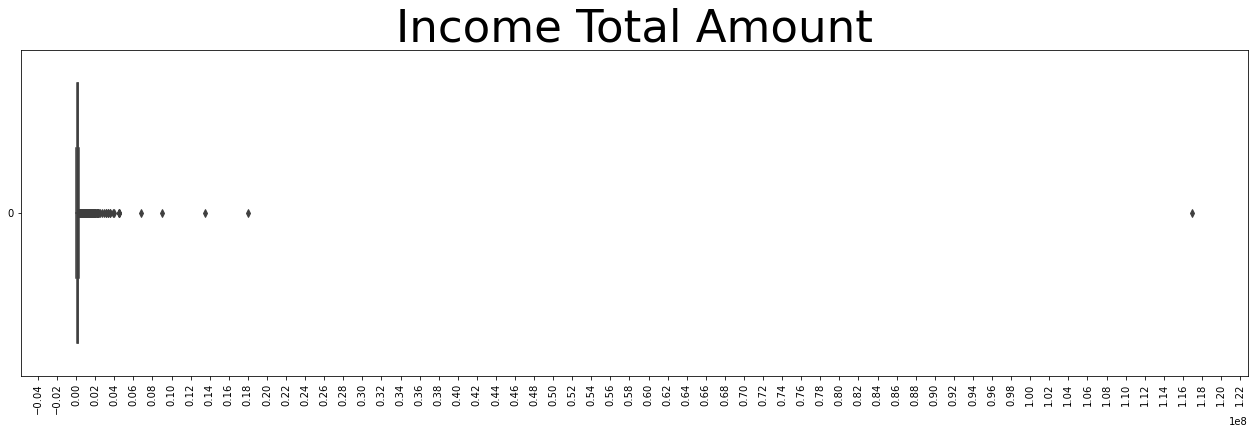

In [58]:
#Box Plot for AMT_INCOME_TOTAL Variable

fig = plt.figure(figsize=(22,6))
ax = sns.boxplot(data=customer_data.AMT_INCOME_TOTAL, orient='h')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2000000))
ax.set_title('Income Total Amount',fontsize=45)
plt.xticks(rotation=90)
plt.show()

In [59]:
# Describing the AMT_INCOME_TOTAL column for max value

customer_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

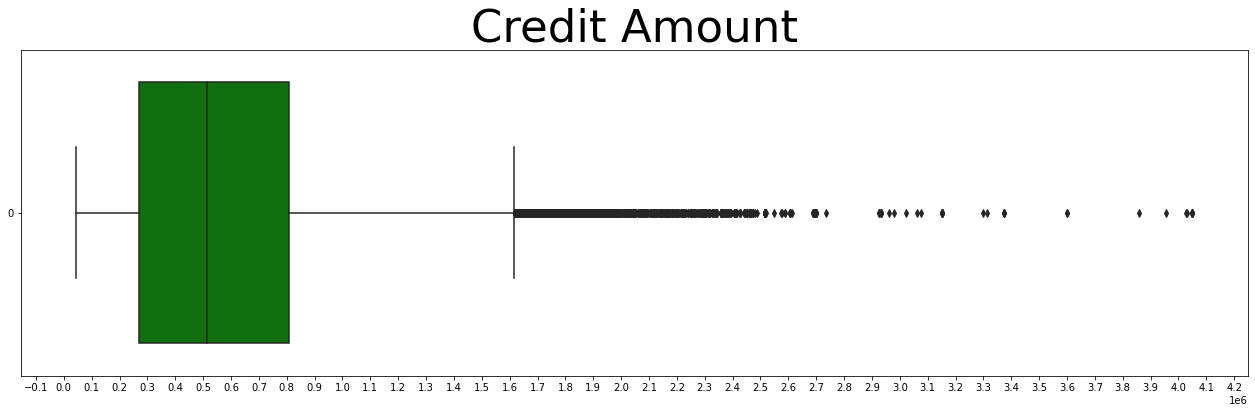

In [60]:
# Box Plot for AMT_CREDIT Variable

fig = plt.figure(figsize=(22,6))
ax = sns.boxplot(data=customer_data.AMT_CREDIT,orient='h',color='green')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticker.MultipleLocator(100000))
ax.set_title('Credit Amount',fontsize=45)
plt.show()

In [61]:
# Describing the AMT_CREDIT column 

customer_data.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

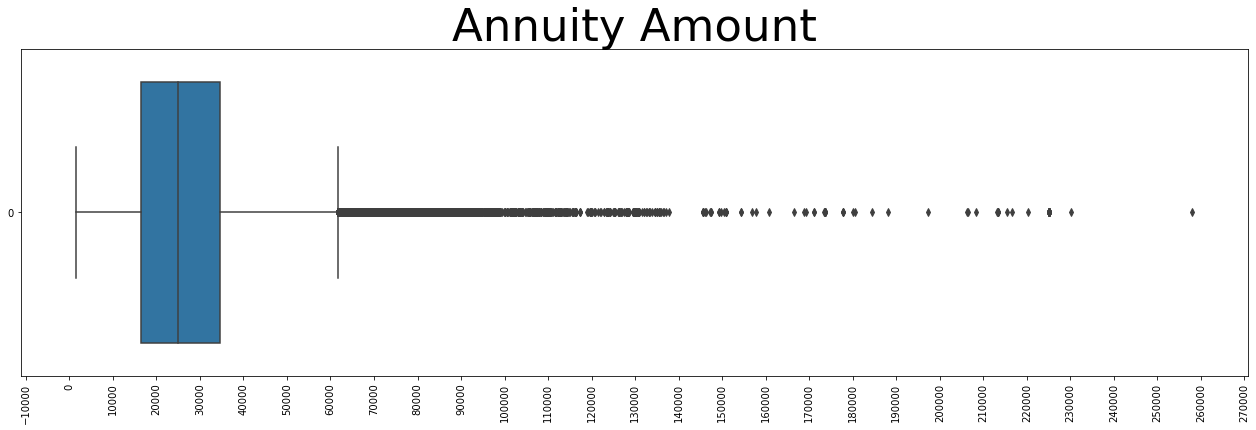

In [62]:
# Box Plot for AMT_ANNUITY Variable

fig = plt.figure(figsize=(22,6))
ax = sns.boxplot(data =customer_data.AMT_ANNUITY,orient='h')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10000))
ax.set_title('Annuity Amount',fontsize=45)
plt.xticks(rotation=90)
plt.show()

In [63]:
# Describing the AMT_ANNUITY column 

customer_data.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

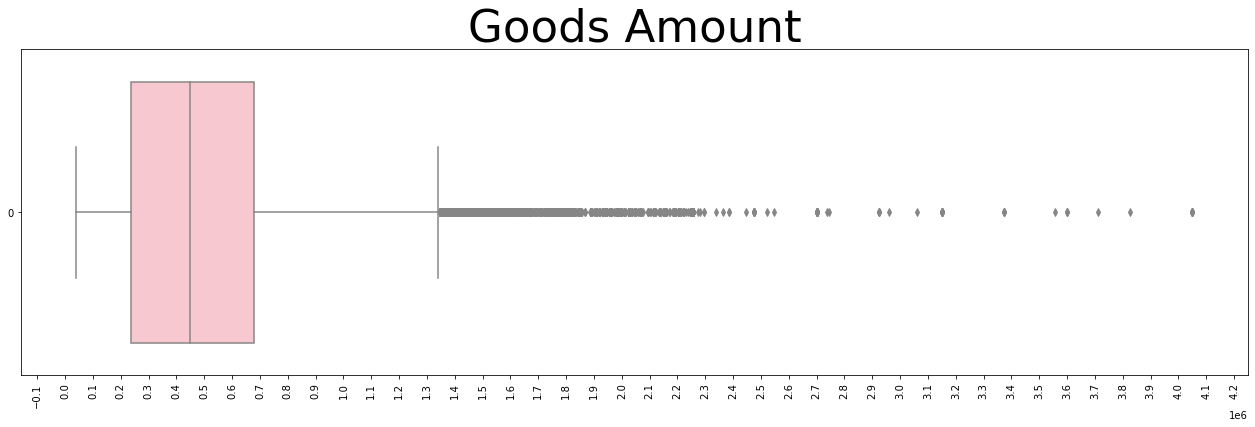

In [64]:
# Box Plot for AMT_GOODS_PRICE Variable

fig = plt.figure(figsize=(22,6))
ax = sns.boxplot(data=customer_data.AMT_GOODS_PRICE,orient='h',color='pink')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticker.MultipleLocator(100000))
ax.set_title('Goods Amount',fontsize=45)
plt.xticks(rotation = 90)
plt.show()

In [65]:
# Describing the AMT_GOODS_PRICE column 

customer_data.AMT_GOODS_PRICE.describe()

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

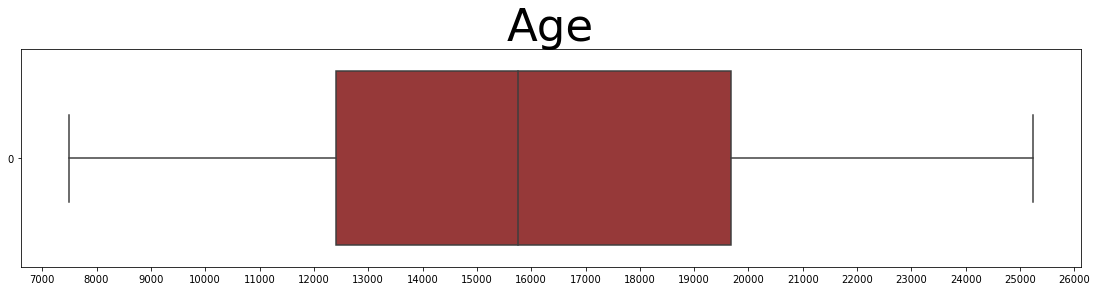

In [66]:
# Box Plot for DAYS_BIRTH Variable

fig = plt.figure(figsize=(19,4))
ax = sns.boxplot(data=customer_data.DAYS_BIRTH, orient='h',color='brown')
ax.set_xscale('linear')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.set_title('Age',fontsize=45)
plt.show()

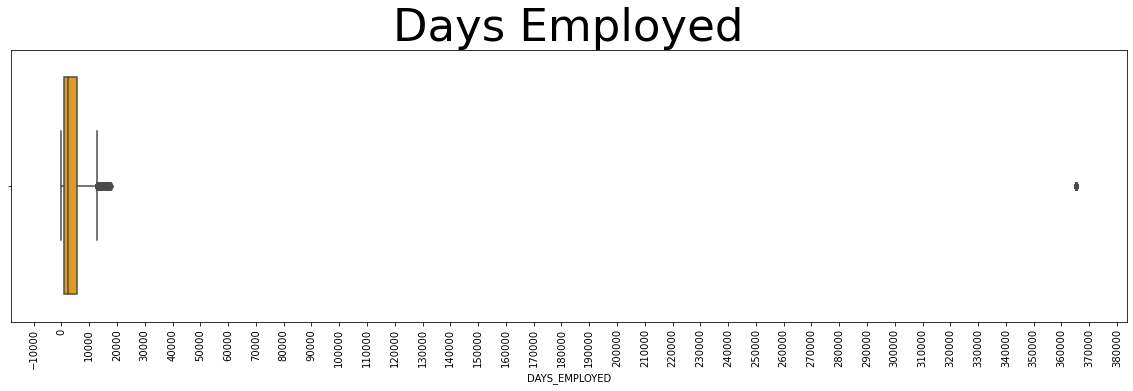

In [67]:
# Box Plot for DAYS_EMPLOYED Variable

fig = plt.figure(figsize=(20,5))
ax = sns.boxplot(customer_data.DAYS_EMPLOYED, orient='h', color='orange')
ax.set_title('Days Employed',fontsize=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10000))
plt.xticks(rotation=90)
plt.show()

In [68]:
# Describing the DAYS_EMPLOYED column 

customer_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [69]:
# Converting to years

years = 365243 / 365
years

1000.6657534246575

In [70]:
# Treating the outlier value of DAYS_EMPLOYED column

customer_data = customer_data [customer_data.DAYS_EMPLOYED<np.nanpercentile(customer_data['DAYS_EMPLOYED'], 99)]

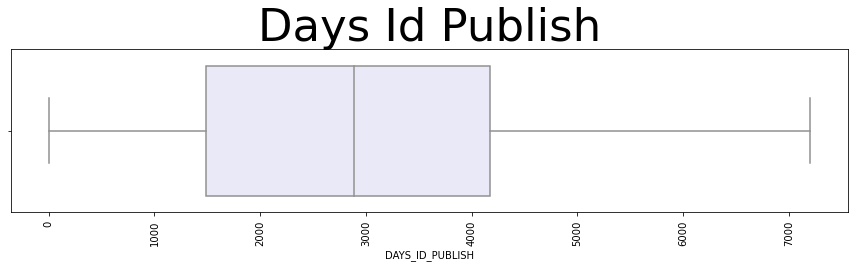

In [71]:
#  Box Plot for DAYS_ID_PUBLISH Variable

fig = plt.figure(figsize=(15,3))
ax = sns.boxplot(customer_data.DAYS_ID_PUBLISH,orient='h',color='lavender')
ax.set_title('Days Id Publish',fontsize=45)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.xticks(rotation=90)
plt.show()

In [72]:
# Checking the TARGET column for imbalance data in percentage

customer_data.TARGET.value_counts(normalize=True)*100

0    91.340025
1     8.659975
Name: TARGET, dtype: float64

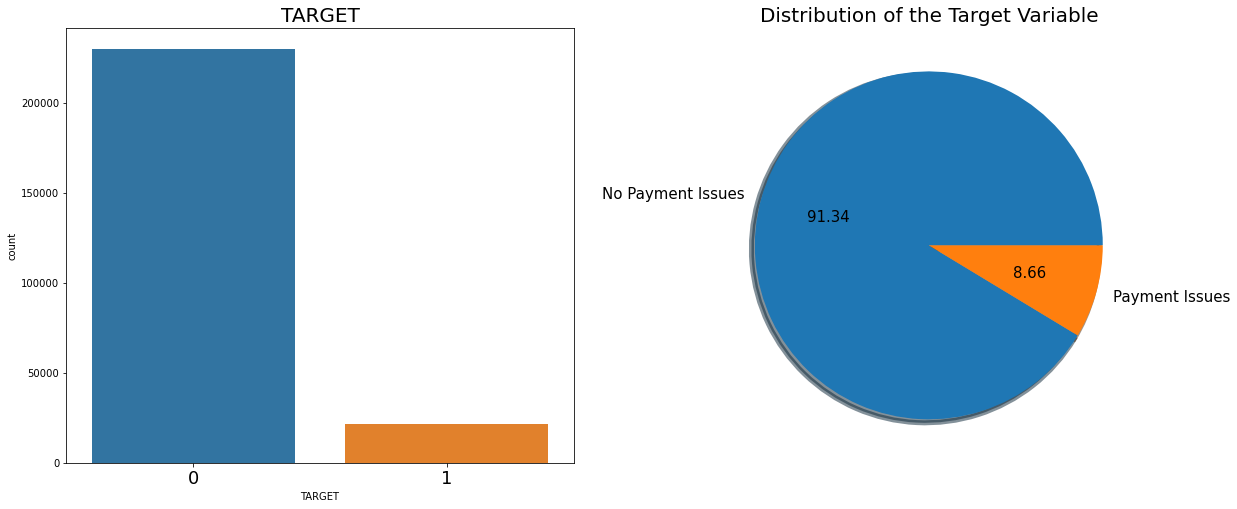

In [73]:
# Plotting the graphs

fig, (ax1,ax2) = plt.subplots(1,2,figsize =(20,8))

ax = sns.countplot(customer_data.TARGET,ax=ax1)

ax1.set_title('TARGET',fontsize=20)

plt.setp(ax1.xaxis.get_majorticklabels(),fontsize=18)

ax2 = plt.pie(x=customer_data.TARGET.value_counts(normalize=True),autopct='%.2f',textprops={'fontsize':15},shadow=True,labels=['No Payment Issues','Payment Issues'],wedgeprops = {'linewidth': 5}) 

plt.title('Distribution of the Target Variable',fontsize=20)

plt.show()

In [74]:
# Check the Imbalance Percentage

print('Imbalance Percentage is : %.2f'%(customer_data.TARGET.value_counts(normalize=True)[0]/customer_data.TARGET.value_counts(normalize=True)[1]))

Imbalance Percentage is : 10.55


In [75]:
# We can divide the dataset to two into different dataframes i.e. target=0 (client with no payment difficulties) & target=1 (client with payment difficulties)
 
target0 = customer_data.loc[customer_data["TARGET"]==0]
target1 = customer_data.loc[customer_data["TARGET"]==1]

In [76]:
# function for countplot

def graph_uni(col):
    plt.figure(figsize=(17,6))
    plt.style.use('bmh')
    plt.subplot(1, 2, 1)
    sns.countplot(col, data=target0)
    plt.title('Distribution of '+ '%s' %col +' for target=0', fontsize=15)
    plt.xlabel(col , fontsize=15)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    
    plt.subplot(1, 2, 2)
    sns.countplot(col, data=target1)
    plt.title('Distribution of '+ '%s' %col +' for target=1', fontsize=14)
    plt.xlabel(col , fontsize=15)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

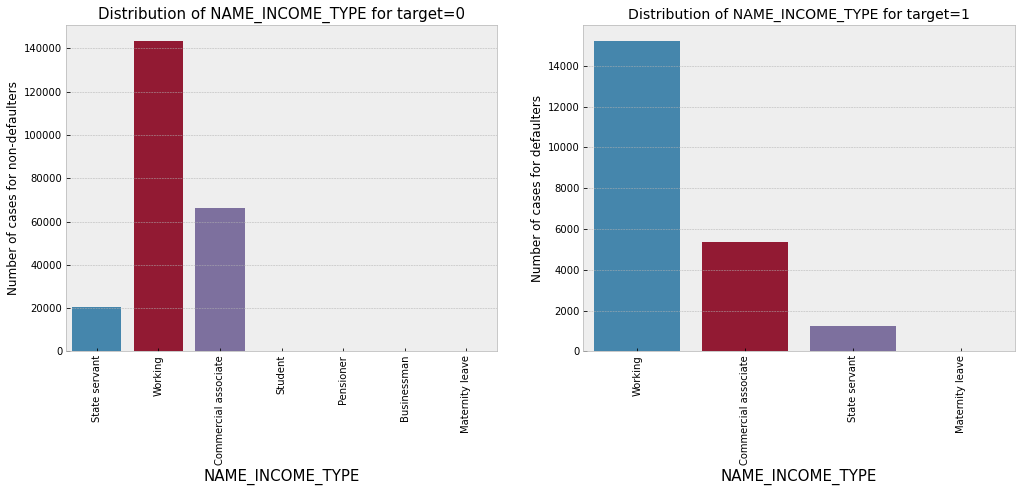

In [77]:
# graph for NAME_INCOME_TYPE column

graph_uni('NAME_INCOME_TYPE')
plt.show()

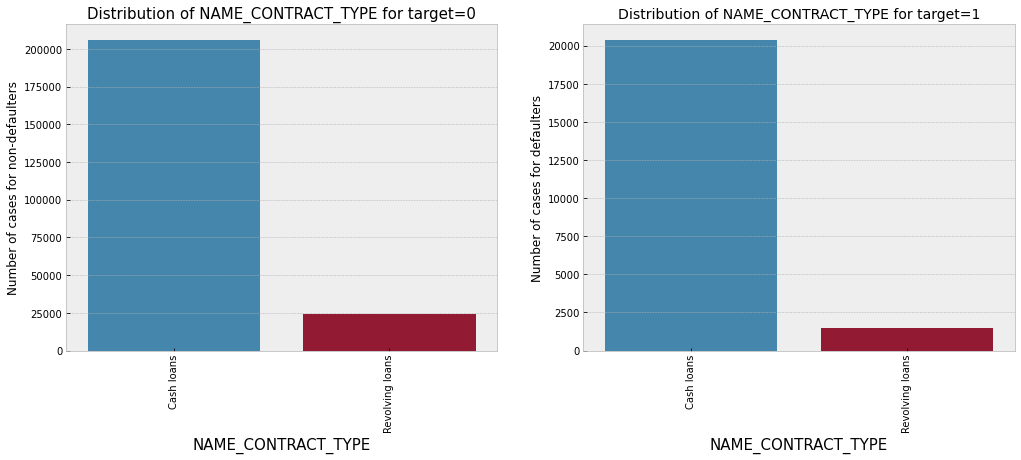

In [78]:
# graph for NAME_CONTRACT_TYPE column

graph_uni('NAME_CONTRACT_TYPE')

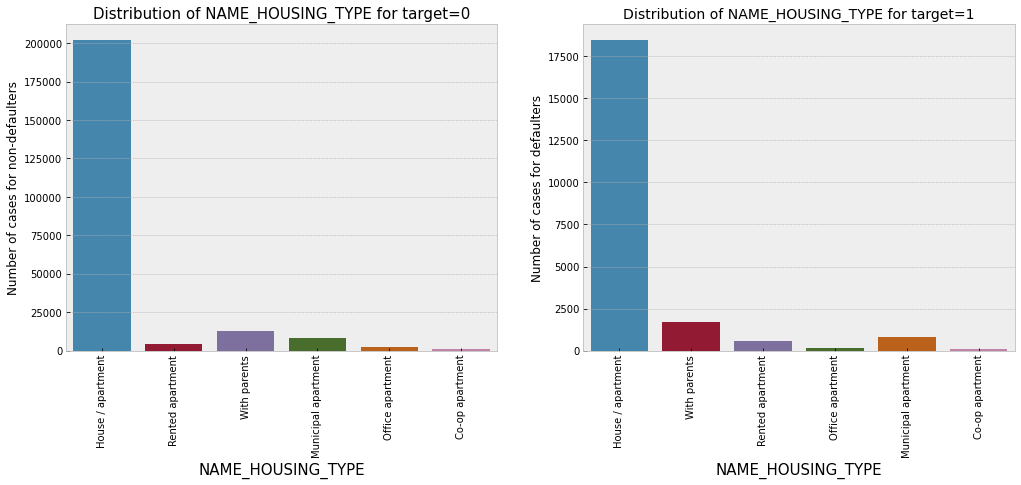

In [79]:
# graph for NAME_HOUSING_TYPE column

graph_uni('NAME_HOUSING_TYPE')

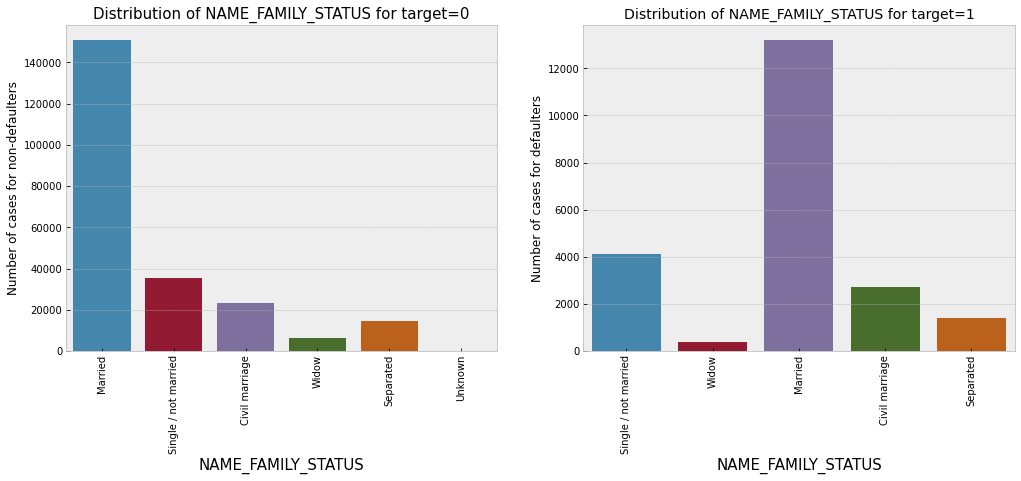

In [80]:
# graph for CODE_GENDER column

graph_uni('NAME_FAMILY_STATUS')

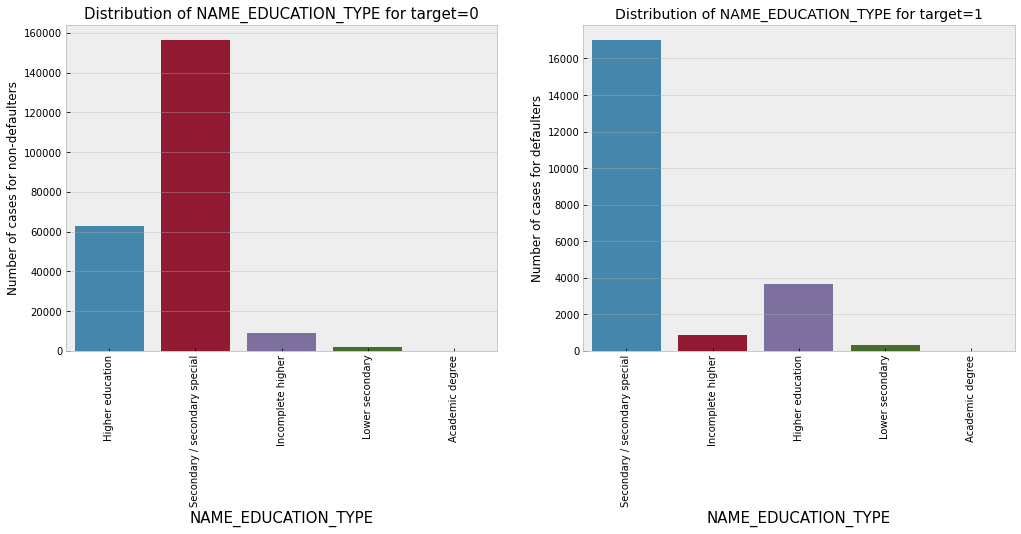

In [81]:
# graph for NAME_EDUCATION_TYPE column

graph_uni('NAME_EDUCATION_TYPE')

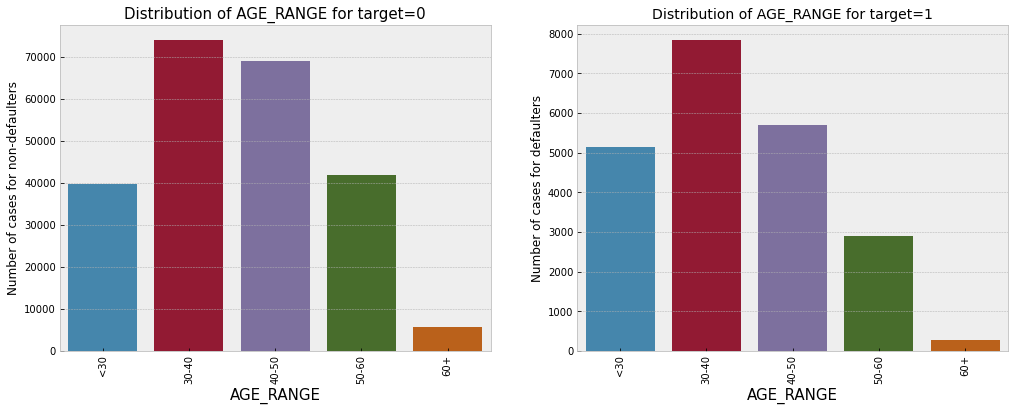

In [82]:
# graph for AGE_RANGE column

graph_uni('AGE_RANGE')

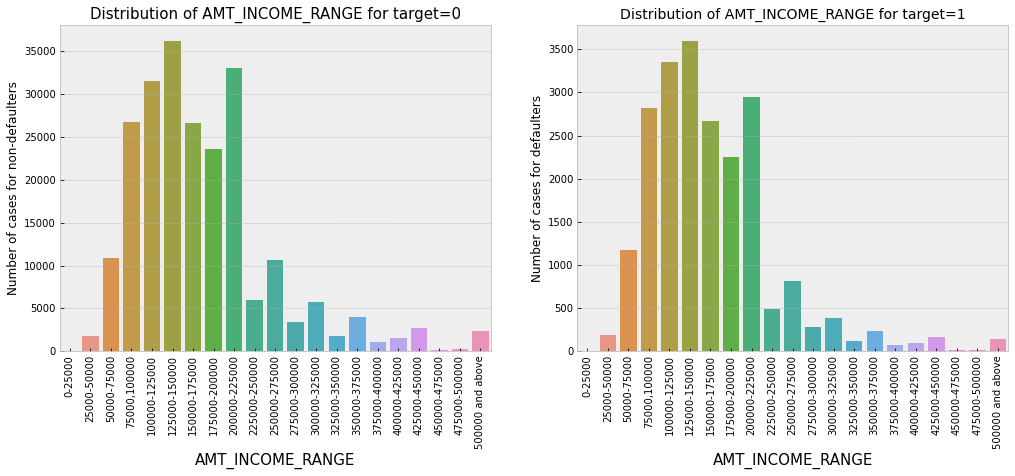

In [83]:
# graph for AMT_INCOME_RANGE column

graph_uni('AMT_INCOME_RANGE')

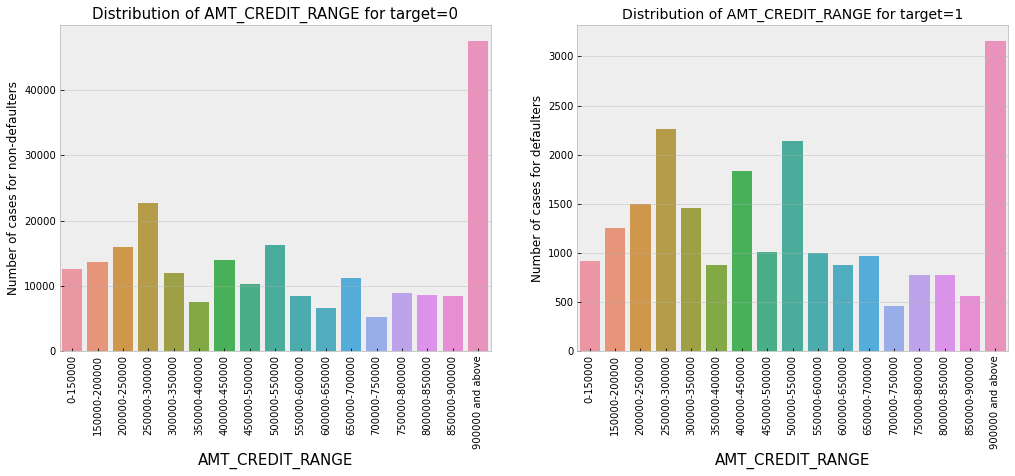

In [84]:
# graph for AMT_CREDIT_RANGE column

graph_uni('AMT_CREDIT_RANGE')

In [85]:
def graph(customer_data, col, title, hue =None):
    
    sns.set_style("darkgrid")
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(customer_data[col].unique()) + 6.5 + 5*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    
    ax = sns.countplot(data = customer_data, x= col, order=customer_data[col].value_counts().index, hue = hue, palette='pastel') 
    plt.show()

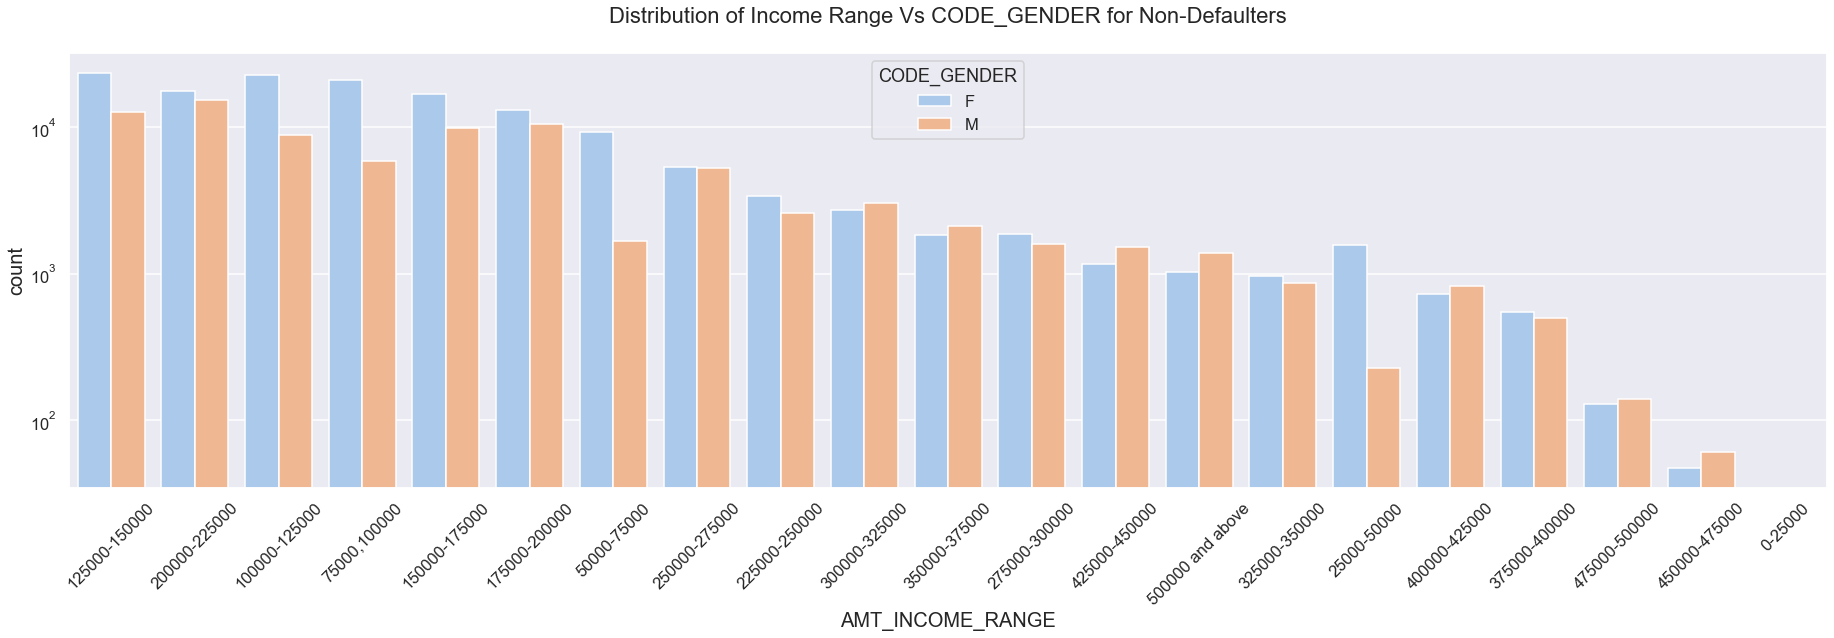

In [86]:
# Countplot for Income Range Type Vs Gender for target = 0

graph(target0 ,col='AMT_INCOME_RANGE',title='Distribution of Income Range Vs CODE_GENDER for Non-Defaulters', hue='CODE_GENDER')

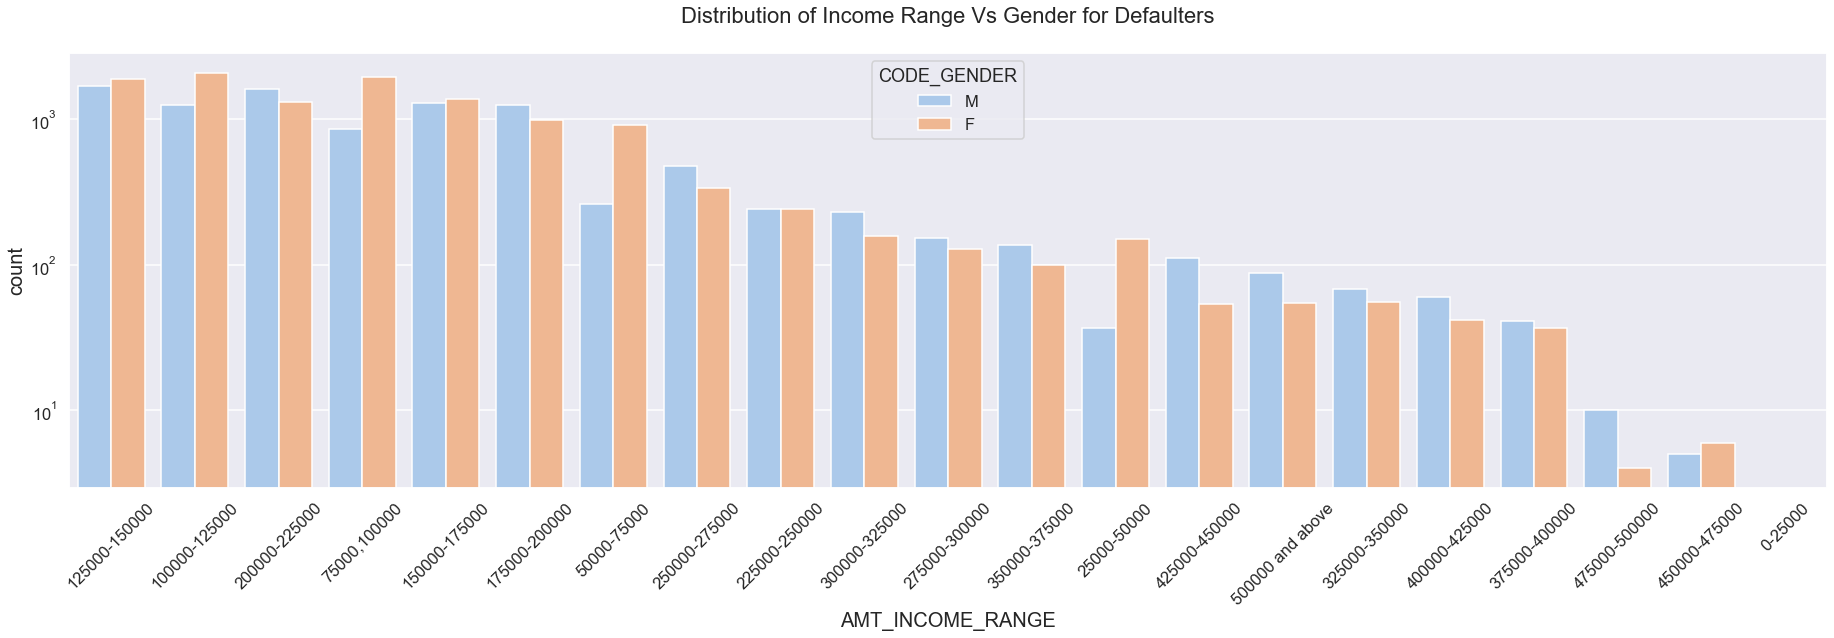

In [87]:
# Countplot for Income Range Type Vs Gender for target = 1

graph(target1 ,col='AMT_INCOME_RANGE',title='Distribution of Income Range Vs Gender for Defaulters', hue='CODE_GENDER')

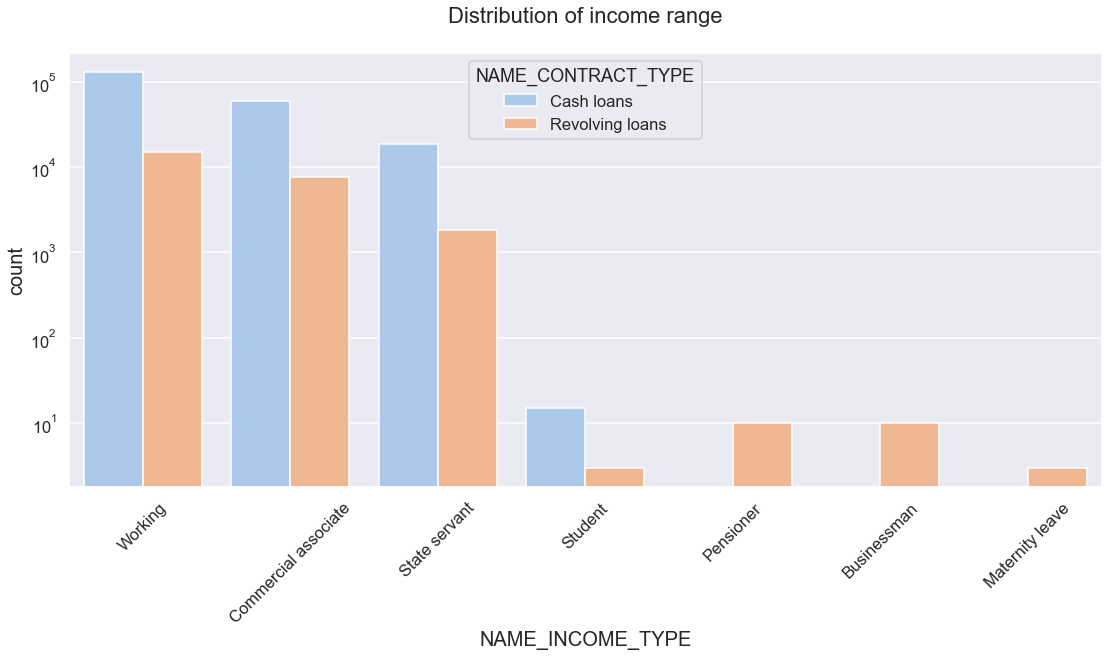

In [88]:
# Countplot for Income Type Vs Contract type for target = 0

graph(target0 ,col='NAME_INCOME_TYPE',title='Distribution of income range', hue='NAME_CONTRACT_TYPE')

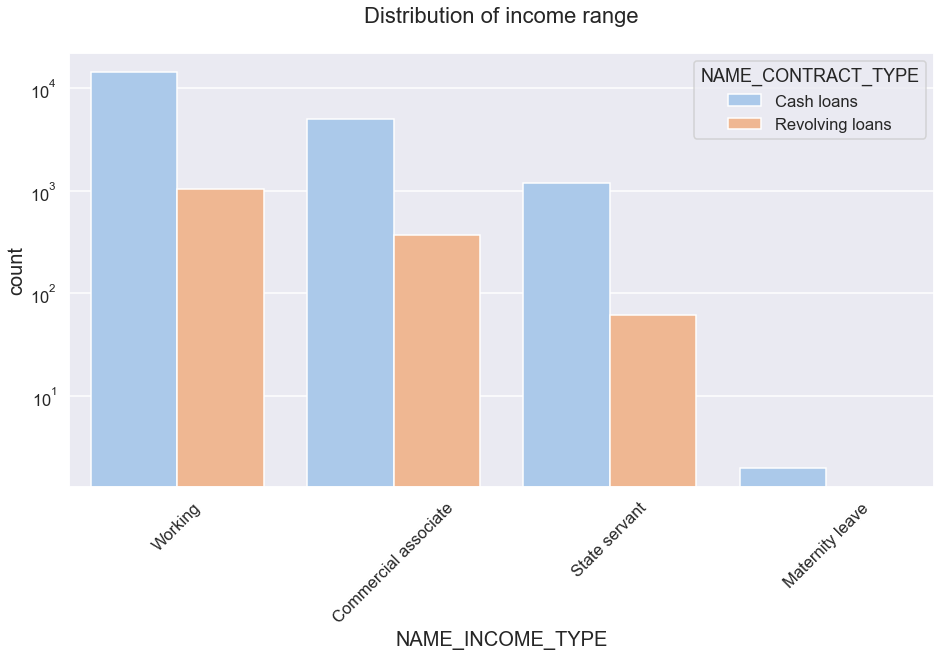

In [89]:
# Countplot for Income Type Type Vs Contract type for target = 1

graph(target1 ,col='NAME_INCOME_TYPE',title='Distribution of income range', hue='NAME_CONTRACT_TYPE')

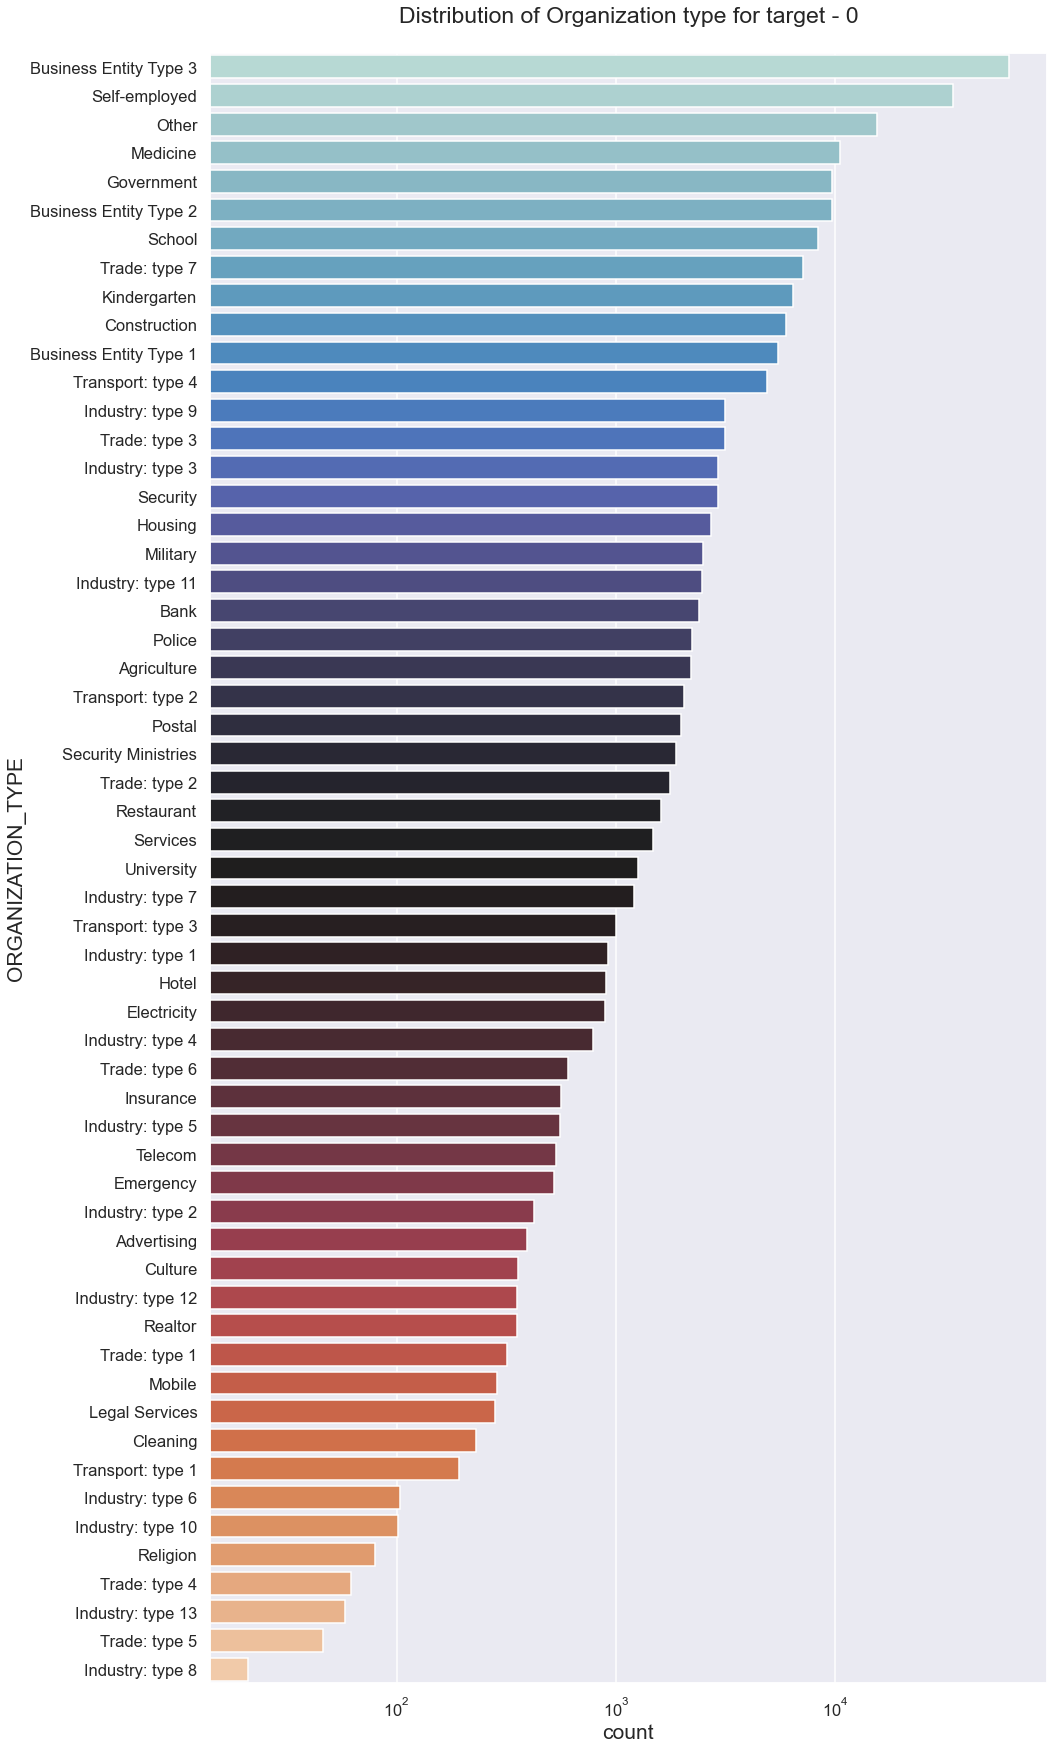

In [90]:
# function for countplot

plt.figure(figsize=(15,30))
sns.set_style('darkgrid')
plt.rcParams["axes.labelsize"] = 21
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')

plt.title("Distribution of Organization type for target - 0")

sns.countplot(data=target0 ,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index, palette="icefire")
plt.show()

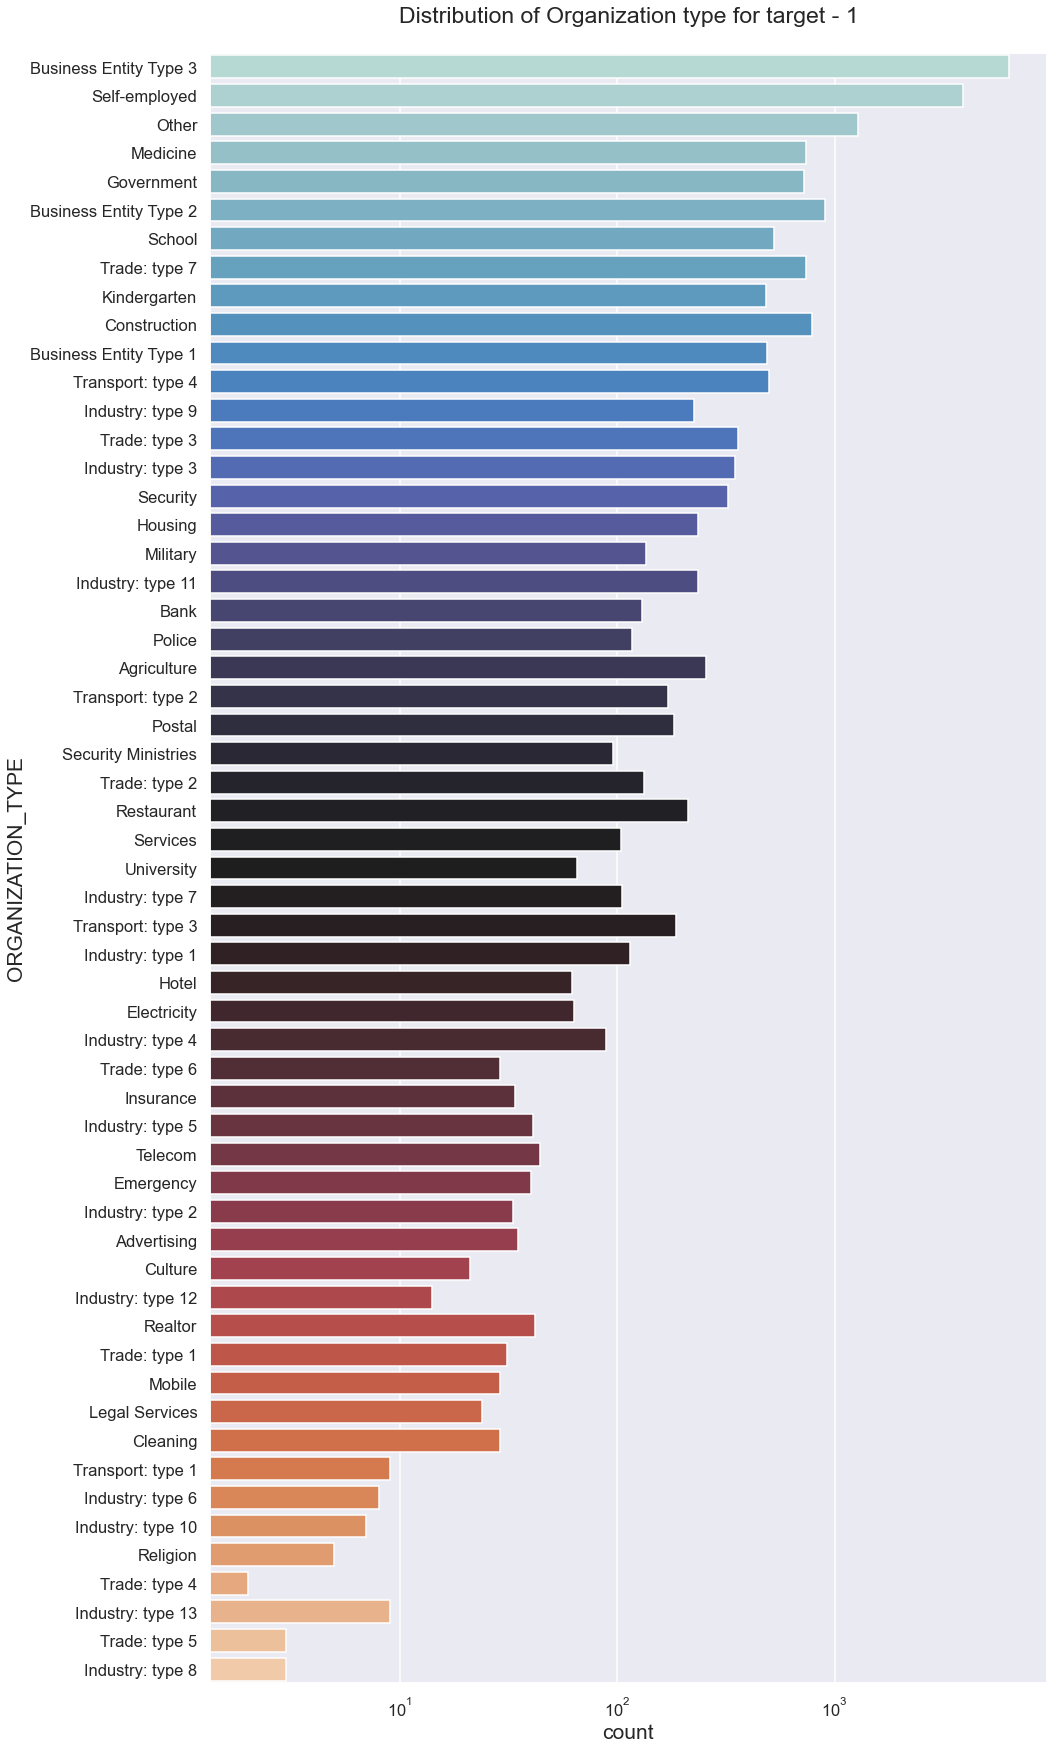

In [91]:
# Graph for ORGANIZATION TYPE

plt.figure(figsize=(15,30))
sns.set_style('darkgrid')
plt.rcParams["axes.labelsize"] = 21
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')

plt.title("Distribution of Organization type for target - 1")

sns.countplot(data=target1 ,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index, palette="icefire")

plt.show()

In [92]:
# Creating the function for the numeric bivariate analysis

def graph_numeric (a,b):
    sns.set_style(style='ticks')
    fig=plt.figure(figsize=(16,7))
    
    sns.scatterplot(data = target0, y = b, x = a,  label='Loan Repayers',    color='steelblue')
    sns.scatterplot(data = target1, y = b, x = a,  label='Loan Defaulters',  color='hotpink')
    
    plt.title(f'{a} vs {b}',fontsize=21)
    plt.show()

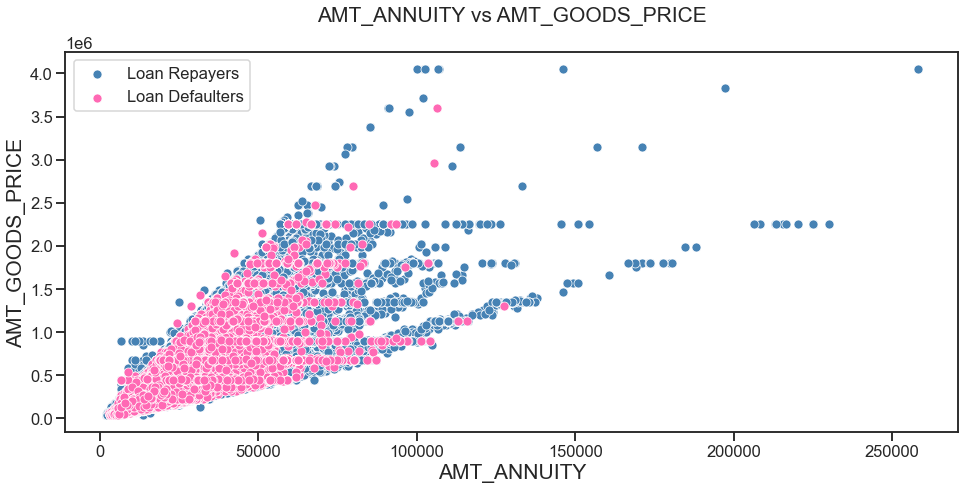

In [93]:
# graph for AMT_ANNUITY vs AMT_GOODS_PRICE

graph_numeric ('AMT_ANNUITY','AMT_GOODS_PRICE')

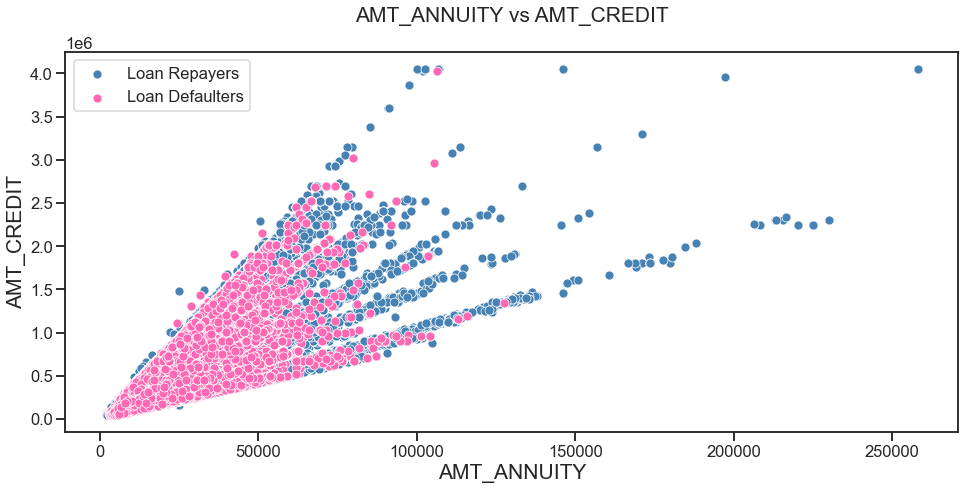

In [94]:
# graph for AMT_ANNUITY vs AMT_CREDIT

graph_numeric('AMT_ANNUITY','AMT_CREDIT')

In [95]:
# Dropping the columns which are not required for target 0

cols_drop = ['SK_ID_CURR','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
target0 = target0.drop(columns=cols_drop)

In [96]:
# Creating the correlation matrix for the Loan defaulter data frame

corr_t0 = target0.corr().abs().round(3)
corr_t0

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.000,0.010,0.019,0.008,0.022,0.030,0.242,0.063,0.163,0.118,0.893,0.037,0.033
AMT_INCOME_TOTAL,NaN,0.010,1.000,0.326,0.401,0.333,0.169,0.046,0.030,0.035,0.026,0.003,0.184,0.056
AMT_CREDIT,NaN,0.019,0.326,1.000,0.762,0.986,0.104,0.153,0.088,0.015,0.035,0.037,0.107,0.040
AMT_ANNUITY,NaN,0.008,0.401,0.762,1.000,0.767,0.122,0.092,0.052,0.010,0.026,0.041,0.132,0.034
AMT_GOODS_PRICE,NaN,0.022,0.333,0.986,0.767,1.000,0.107,0.147,0.089,0.012,0.037,0.035,0.108,0.050
REGION_POPULATION_RELATIVE,NaN,0.030,0.169,0.104,0.122,0.107,1.000,0.041,0.009,0.060,0.004,0.029,0.543,0.175
DAYS_BIRTH,NaN,0.242,0.046,0.153,0.092,0.147,0.041,1.000,0.353,0.299,0.108,0.178,0.037,0.049
DAYS_EMPLOYED,NaN,0.063,0.030,0.088,0.052,0.089,0.009,0.353,1.000,0.172,0.087,0.032,0.017,0.022
DAYS_REGISTRATION,NaN,0.163,0.035,0.015,0.010,0.012,0.060,0.299,0.172,1.000,0.030,0.156,0.094,0.032


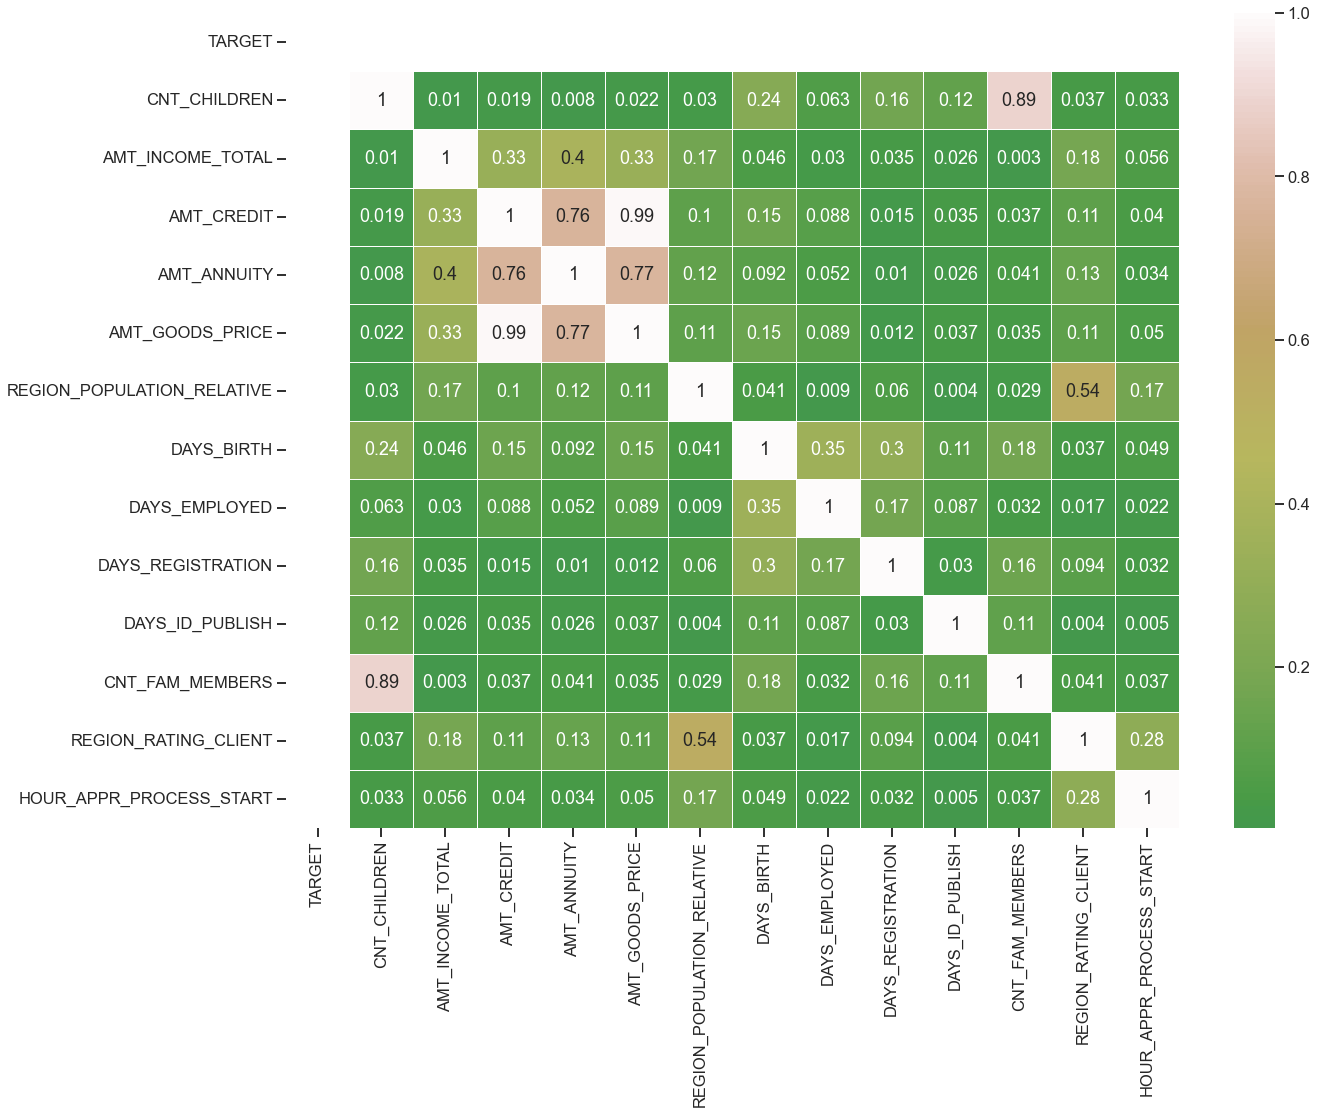

In [97]:
# Visualising the correlation data of target 0 using heatmaps

fig = plt.figure(figsize=(20,15))

sns.heatmap(data=corr_t0 ,linewidths=.5,center=0.1,cmap='gist_earth',annot= True)

plt.show()

In [98]:
# Unstacking the TARGET_0 variable

c = corr_t0 .abs()
s = c.unstack()

In [99]:
# Finding top 10 correlation among the people with no payment issues and displaying it.

target_0_corr = s[s.index.get_level_values(0)!= s.index.get_level_values(1)].sort_values(ascending=False,kind='quicksort').drop_duplicates()

top_10_target0 = pd.DataFrame(target_0_corr)

top_10_target0 = top_10_target0.reset_index().rename(columns={'level_0':'Var1','level_1':'Var2',0:'Correlation'}).dropna()

top_10_target0.head(10)

,Var1,Var2,Correlation
0,AMT_CREDIT,AMT_GOODS_PRICE,0.986
1,CNT_CHILDREN,CNT_FAM_MEMBERS,0.893
2,AMT_GOODS_PRICE,AMT_ANNUITY,0.767
3,AMT_ANNUITY,AMT_CREDIT,0.762
4,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,0.543
5,AMT_INCOME_TOTAL,AMT_ANNUITY,0.401
6,DAYS_EMPLOYED,DAYS_BIRTH,0.353
7,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.333
8,AMT_CREDIT,AMT_INCOME_TOTAL,0.326
9,DAYS_BIRTH,DAYS_REGISTRATION,0.299


In [100]:
# Dropping the columns which are not required for target1

target1 = target1.drop(columns=cols_drop)

In [101]:
# Creating the correlation matrix for the Loan defaulter dataframe

corr_t1 = target1.corr().abs().round(3)
corr_t1

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.000,0.002,0.002,0.016,0.008,0.032,0.177,0.033,0.126,0.090,0.894,0.047,0.039
AMT_INCOME_TOTAL,NaN,0.002,1.000,0.036,0.043,0.036,0.008,0.008,0.000,0.004,0.009,0.004,0.021,0.013
AMT_CREDIT,NaN,0.002,0.036,1.000,0.749,0.982,0.069,0.190,0.106,0.033,0.062,0.045,0.061,0.029
AMT_ANNUITY,NaN,0.016,0.043,0.749,1.000,0.749,0.074,0.090,0.049,0.014,0.044,0.055,0.076,0.023
AMT_GOODS_PRICE,NaN,0.008,0.036,0.982,0.749,1.000,0.076,0.185,0.112,0.032,0.065,0.042,0.069,0.042
REGION_POPULATION_RELATIVE,NaN,0.032,0.008,0.069,0.074,0.076,1.000,0.050,0.016,0.056,0.012,0.031,0.443,0.144
DAYS_BIRTH,NaN,0.177,0.008,0.190,0.090,0.185,0.050,1.000,0.307,0.241,0.136,0.110,0.049,0.035
DAYS_EMPLOYED,NaN,0.033,0.000,0.106,0.049,0.112,0.016,0.307,1.000,0.137,0.097,0.002,0.007,0.000
DAYS_REGISTRATION,NaN,0.126,0.004,0.033,0.014,0.032,0.056,0.241,0.137,1.000,0.050,0.124,0.112,0.048


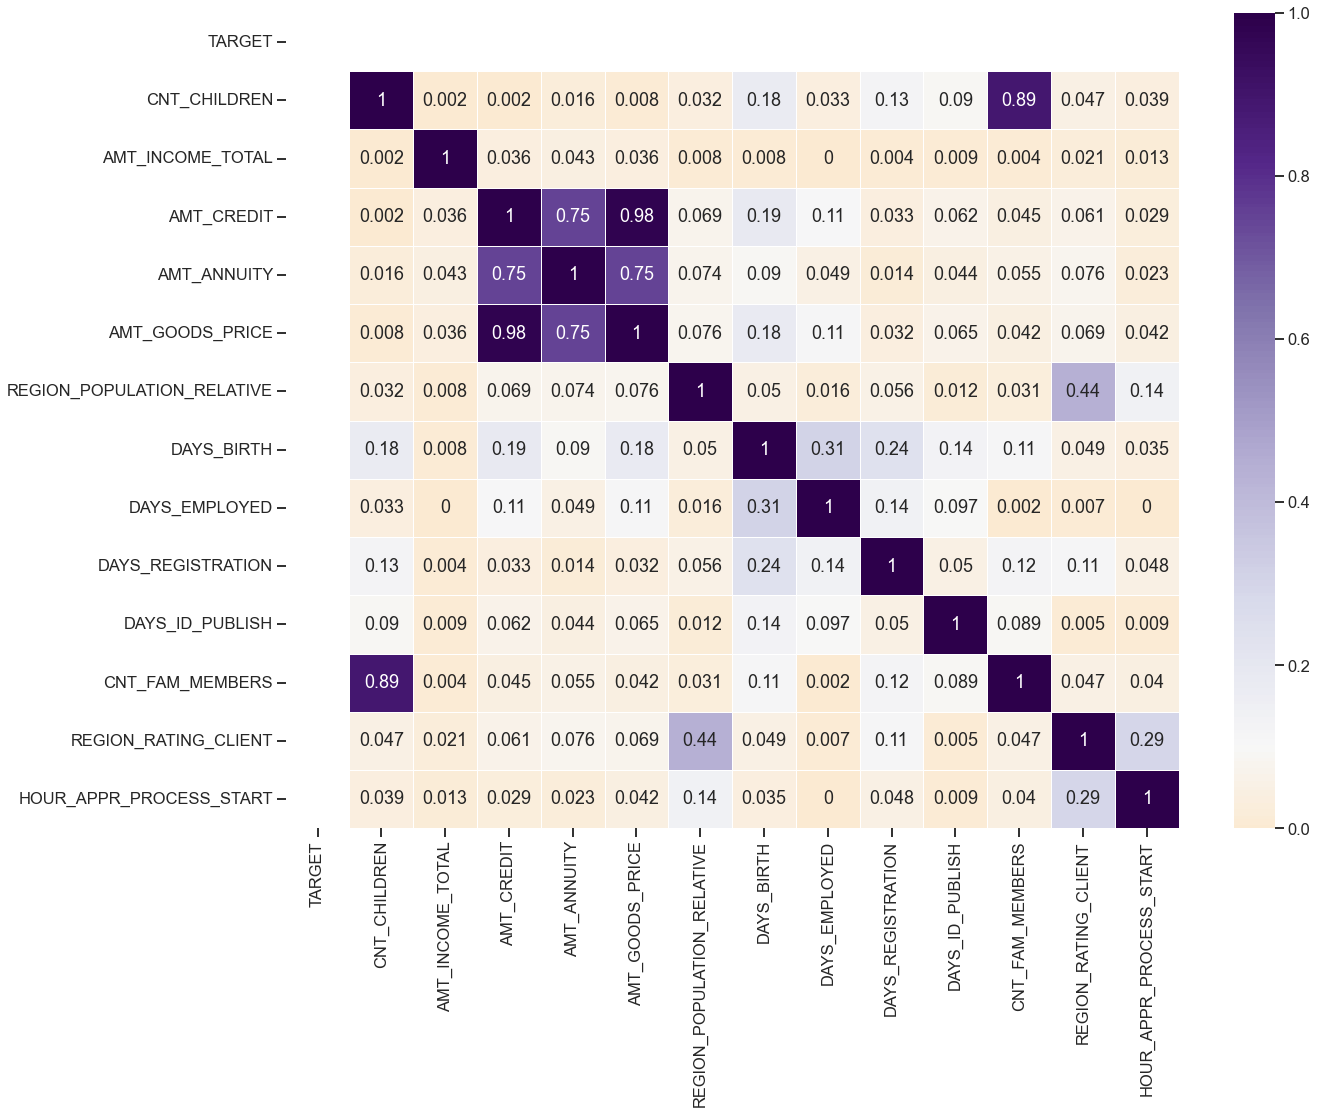

In [102]:
# PLotting the heatmap for displaying the correlation for target 1

fig = plt.figure(figsize=(20,15))

sns.heatmap(data=corr_t1,annot=True,cmap='PuOr',linewidths=0.5,center=0.1)

plt.show()

In [103]:
#unstacking the correlation of target1 variable
c1 = corr_t1

s1 = c1.unstack()

In [104]:
# Displaying Top 10 Correlations from target_1 : Loan Defaulter data frame

target_1_corr = s1[s1.index.get_level_values(0)!= s1.index.get_level_values(1)].sort_values(ascending=False,kind='quicksort').drop_duplicates()

top_10_target1  = pd.DataFrame(target_1_corr)

top_10_target1 = top_10_target1.reset_index().rename(columns={'level_0':'Var1','level_1':'Var2',0:'Correlation'}).dropna()

top_10_target1.head(10)

,Var1,Var2,Correlation
0,AMT_GOODS_PRICE,AMT_CREDIT,0.982
1,CNT_FAM_MEMBERS,CNT_CHILDREN,0.894
2,AMT_CREDIT,AMT_ANNUITY,0.749
3,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.443
4,DAYS_BIRTH,DAYS_EMPLOYED,0.307
5,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,0.290
6,DAYS_REGISTRATION,DAYS_BIRTH,0.241
7,AMT_CREDIT,DAYS_BIRTH,0.190
8,AMT_GOODS_PRICE,DAYS_BIRTH,0.185
9,CNT_CHILDREN,DAYS_BIRTH,0.177


In [105]:
# Merging the Application Dataset with Previous Appliaction Dataset

merge_df = pd.merge(left=customer_data,right=customer_prev_data,how='inner',on='SK_ID_CURR',suffixes='_x')

In [106]:
# Renaming the column names after merging the data

rename_merge_df = merge_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [107]:
# Removing unwanted columns for analysis of merged data

rename_merge_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START_PREV','HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'], axis=1, inplace=True)

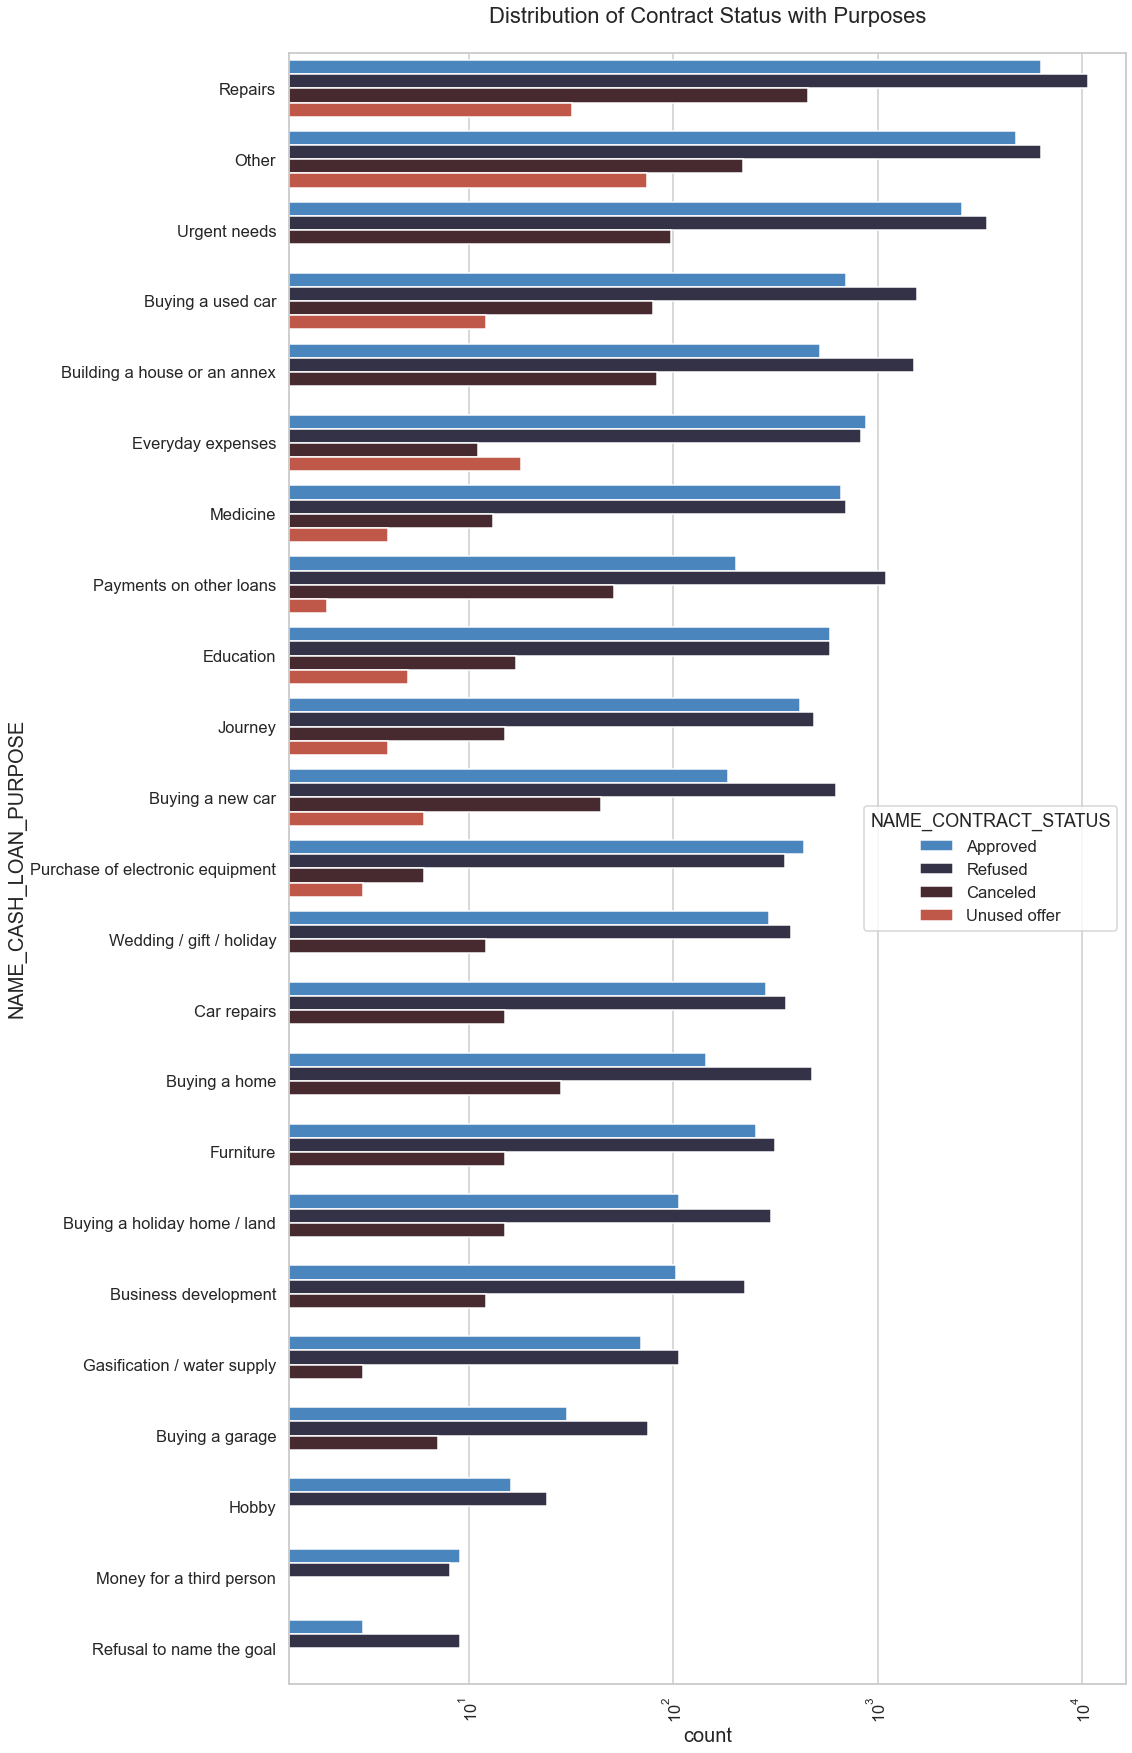

In [108]:
# Distribution of Cash Loans Vs Contract Purpose

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Contract Status with Purposes')

ax = sns.countplot(data = rename_merge_df, y= 'NAME_CASH_LOAN_PURPOSE', order=rename_merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='icefire')

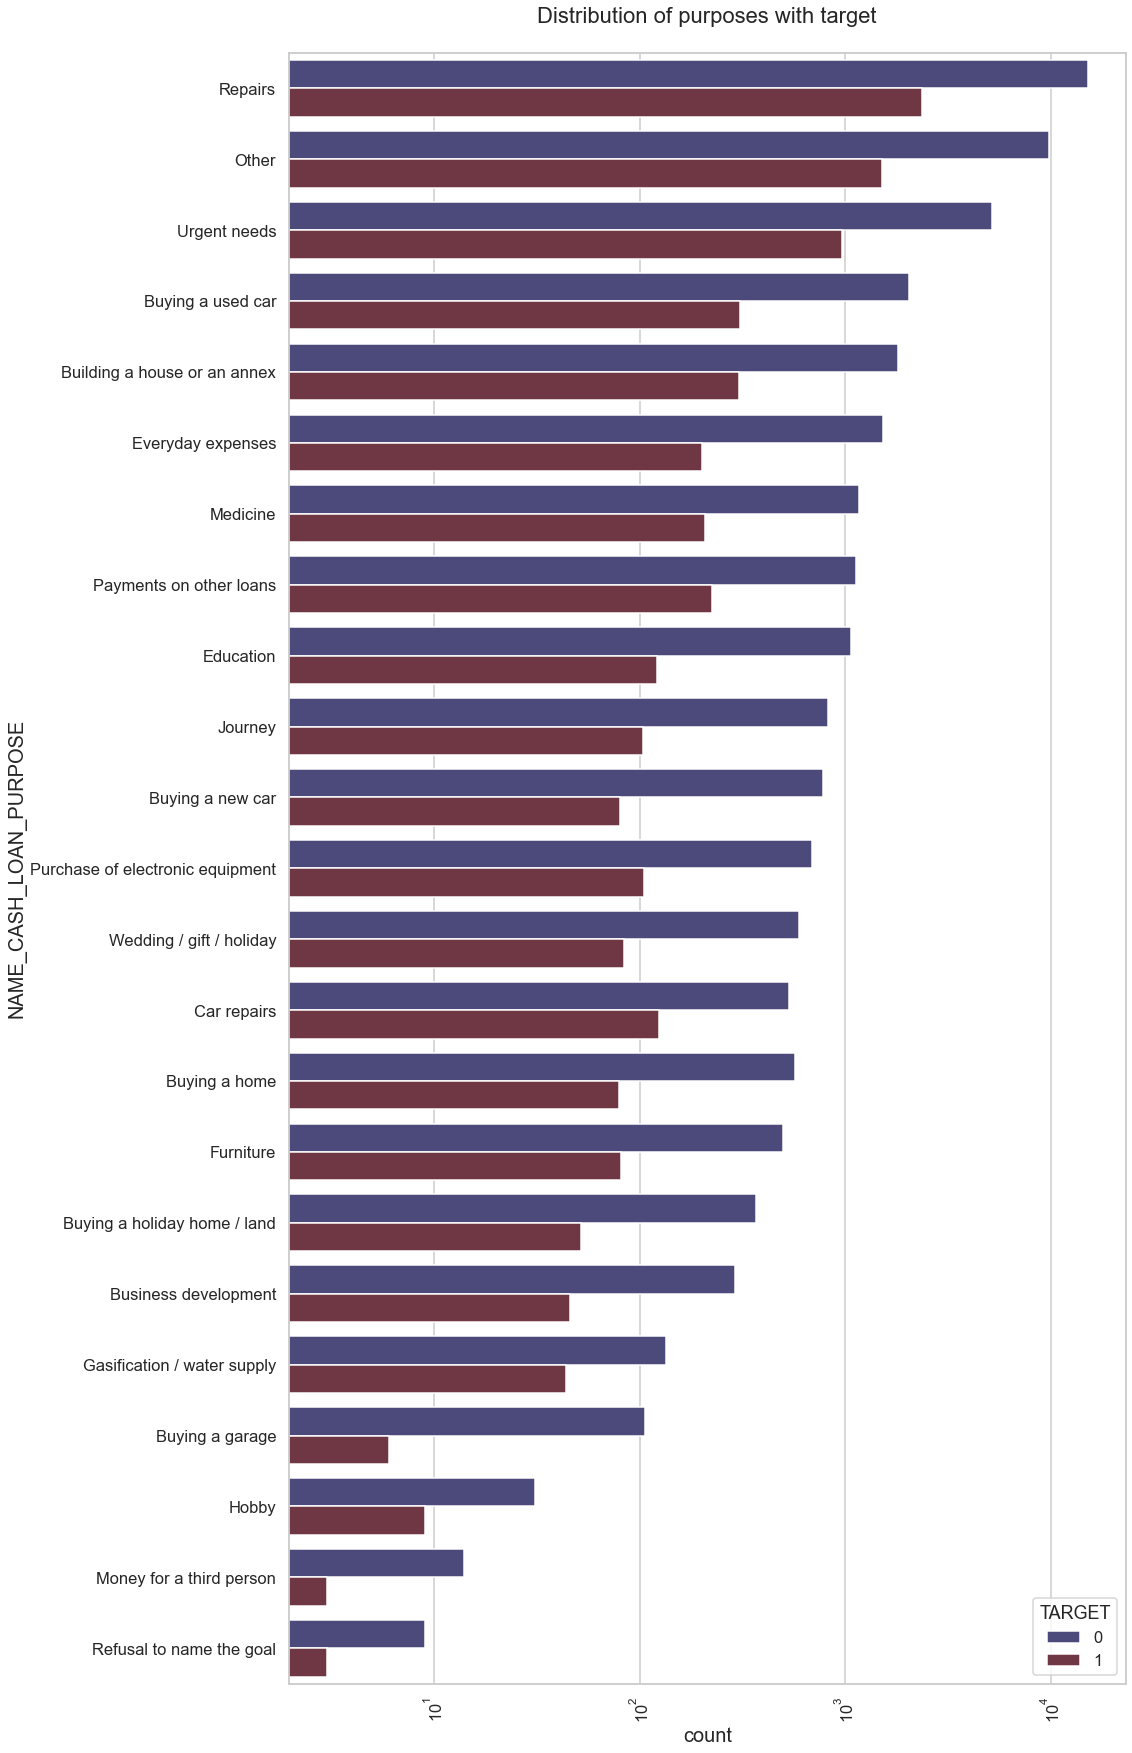

In [109]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target')

ax = sns.countplot(data = rename_merge_df, y= 'NAME_CASH_LOAN_PURPOSE', order=rename_merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue ='TARGET', palette='icefire')

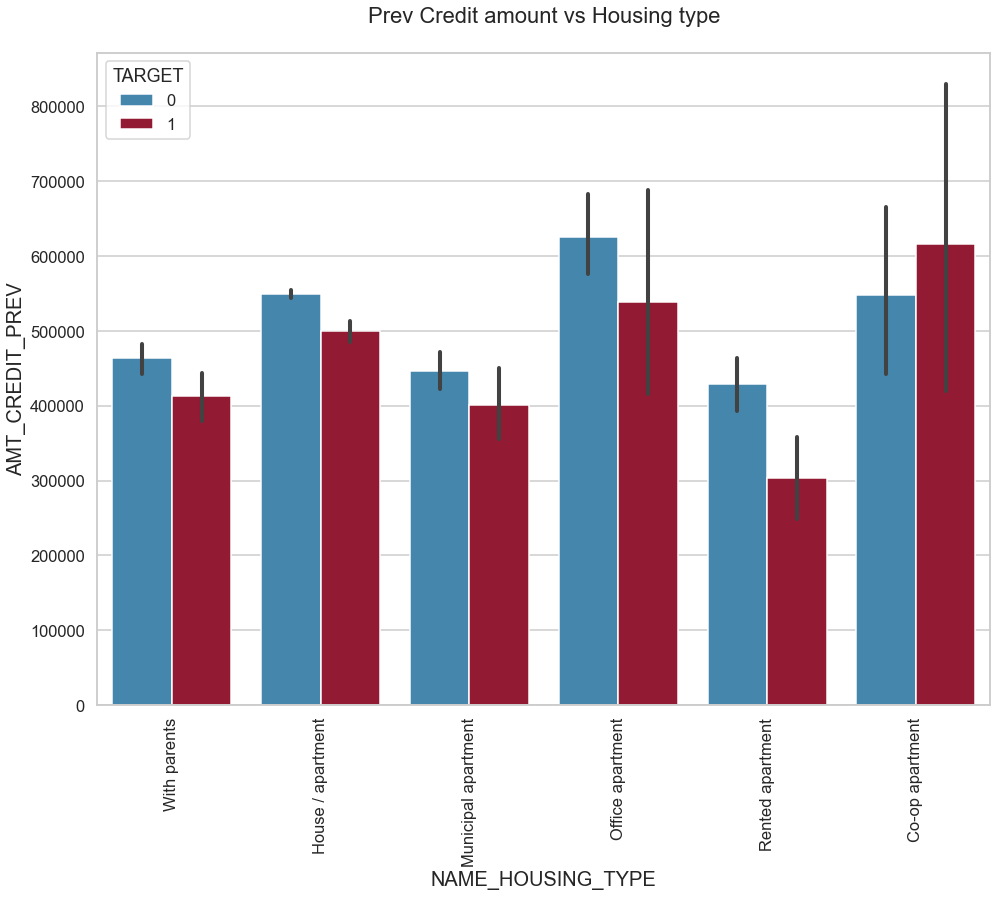

In [110]:
# Bar plotting for Credit amount prev vs Housing type

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data = rename_merge_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()